<a href="https://colab.research.google.com/github/dogjaro/CISA-4358/blob/main/CISA_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# you will need to install the prerequisites with the commands 
#below just uncomment them 

#!pip install Distance
#!pip install scikit-learn scipy matplotlib
#!pip install 'scikit-learn>=0.22.0,<0.24.0' --force-reinstall

In [3]:
#Load the data set into a pandas dataframe and see how many variables in the data set, and what are their data types.
#data_set = pd.read_csv("train.csv")

import pandas as pd
import warnings
data_set = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/train.csv')

In [4]:
#What is the dimension of the data?
data_set.shape

(20800, 5)

In [5]:
# How data looks like? first 20 lines of the data
data_set.head(20)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [6]:
#the columns in the dataset
data_set.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [7]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [8]:
#missing values are present in the dataset
pd.DataFrame(data_set.isnull().sum(),columns=['Count of missing values'])

,Count of missing values
id,0
title,558
author,1957
text,39
label,0


In [9]:
# Percentage of missing values  

pd.DataFrame(round(data_set.isnull().sum()*100/data_set.shape[0],2),columns=['Percentage of missing values'])

,Percentage of missing values
id,0.00
title,2.68
author,9.41
text,0.19
label,0.00


In [10]:
# How to deal with the missing data? Percentage of missing values is less hence dropping those missing rows

data_set.dropna(inplace=True)
data_set.shape
# data_set = data_set.dropna()

(18285, 5)

In [11]:
#resetting the index after dropping missing rows
data_set.reset_index(inplace=False,drop=True)  
data_set.head(20)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [12]:
#Word Clouds #
#Data visualizations (like charts, graphs, infographics, and more) give businesses a valuable way to communicate important information at a glance

from wordcloud import WordCloud, STOPWORDS
from os import path
import matplotlib.pyplot as plt

data_set_unreliable = data_set[data_set['label'] == 1]
data_set_reliable = data_set[data_set['label'] == 0]


Word Cloud for Authors of Reliable news articles:


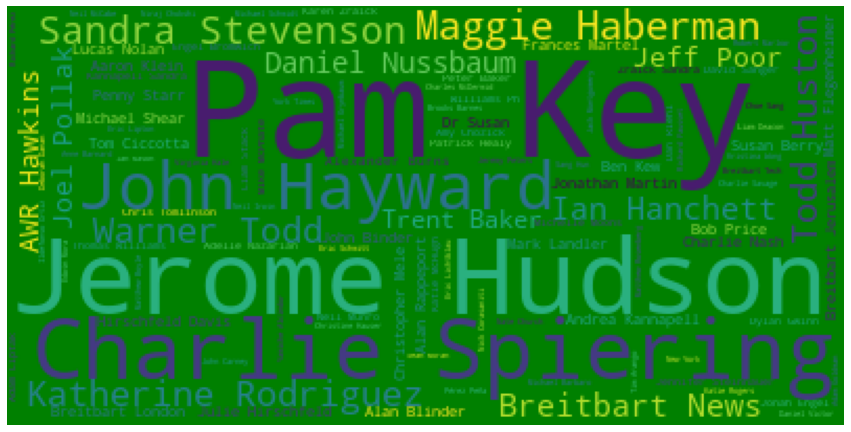

In [13]:
textp_w = data_set_reliable['author']
stopwords = set(STOPWORDS)

print ("Word Cloud for Authors of Reliable news articles:")
wordcloud = WordCloud(background_color ='green').generate(' '.join(textp_w))
plt.figure(figsize=(15,15))
# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Word Cloud for Authors of Fake news articles:


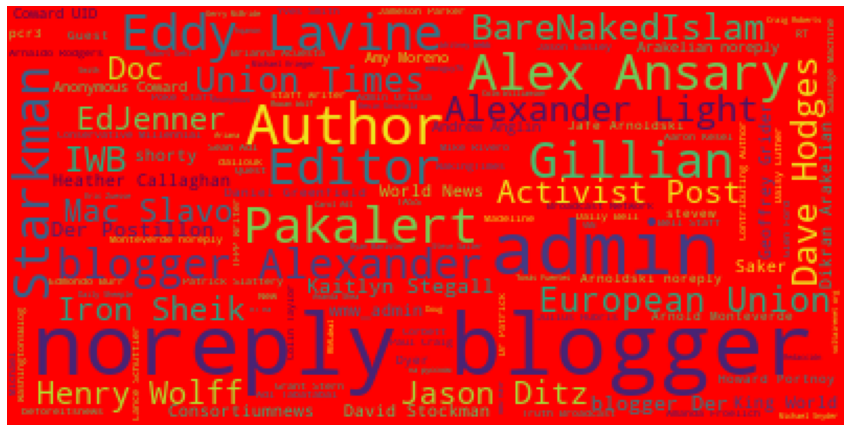

In [14]:
textp_w = data_set_unreliable['author']
stopwords = set(STOPWORDS)

print ("Word Cloud for Authors of Fake news articles:")
wordcloud = WordCloud(background_color ='red').generate(' '.join(textp_w))
plt.figure(figsize=(15,15))
# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [15]:
#Label Distribution (Data Imbalance)
data_set.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

1 : Unreliable or fake
0 : Reliable

Distribution of labels is:
0    10361
1     7924
Name: label, dtype: int64


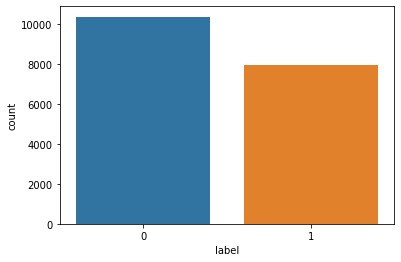

In [16]:
import seaborn as sns

sns.countplot(x = data_set['label']);
print("1 : Unreliable or fake")
print("0 : Reliable")

print("\nDistribution of labels is:")
print(data_set.label.value_counts());


In [17]:
print(round(data_set.label.value_counts(normalize=True),2)*100);

0    57.0
1    43.0
Name: label, dtype: float64


In [18]:
# following code if using Google colab
from google.colab import files
data_set.to_csv('/content/drive/MyDrive/Colab_Notebooks/train_part_1.csv') 
#files.download('train_part_1.csv')

In [19]:
#Importing data from train_part_1.csv
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
#from google.colab import files
#files.upload()

data_set = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/train_part_1.csv',error_bad_lines=False)
data_set = data_set.drop(data_set.columns[0], axis=1)
# Do note that error_bad_lines=False will cause the offending lines to be skipped.

data_set.shape

(18285, 5)

In [20]:
data_set.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [21]:
data_set.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [22]:
data_set.dropna(inplace=True)
data_set.reset_index(inplace=True)
data_set.shape

(18285, 6)

In [23]:
#Data Preprocessing With natural language

import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
# Illustration

doc1 = data_set['title'][0]
doc1

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [25]:
# Here 'House' and 'house' are the same words and should be treated same after converting into numbers
# hence converting them to lower case

doc1 = doc1.lower()
doc1

'house dem aide: we didn’t even see comey’s letter until jason chaffetz tweeted it'

In [26]:
# removing special characters and punctuations

punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''

for ele in doc1: 
    if ele in punc: 
        doc1 = doc1.replace(ele, " ") 
doc1    

'house dem aide  we didn’t even see comey’s letter until jason chaffetz tweeted it'

In [27]:
# Splitting tokens on the basis of space
tokens1 = doc1.split(' ')

# first 20 tokens are
tokens1[:20]

['house',
 'dem',
 'aide',
 '',
 'we',
 'didn’t',
 'even',
 'see',
 'comey’s',
 'letter',
 'until',
 'jason',
 'chaffetz',
 'tweeted',
 'it']

In [28]:
# we need to perform stemming and stopwords on the above tokens

# first 10 words after performing stemming and stopwords removal

words1 = [PorterStemmer().stem(token) for token in tokens1 if token not in set(stopwords.words('english'))]
words1[:20]

['hous',
 'dem',
 'aid',
 '',
 'didn’t',
 'even',
 'see',
 'comey’',
 'letter',
 'jason',
 'chaffetz',
 'tweet']

In [29]:
doc1 = ' '.join(words1)
doc1

'hous dem aid  didn’t even see comey’ letter jason chaffetz tweet'

In [30]:
#clubbing everything together

documents = pd.DataFrame(data_set['title'][:2])

def punc_remove(doc):
  punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''
  for ele in doc: 
    if ele in punc: 
        doc = doc.replace(ele, " ") 
  return doc      


corpus=[]
sentences=[]
for i in range(0,len(documents)):
    review = re.sub('[^a-zA-Z]',' ', documents['title'][i])
    review = review.lower()
    review = punc_remove(review)
    tokens = review.split()
    words = [PorterStemmer().stem(token) for token in tokens if token not in set(stopwords.words('english'))]
    sentences =' '.join(words)
    corpus.append(sentences)

print(corpus)

['hous dem aid even see comey letter jason chaffetz tweet', 'flynn hillari clinton big woman campu breitbart']


In [31]:
# To get the results in 4 decimal points Performing Pre-processing of the data


SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words("english")
from tqdm import tqdm

def preprocess(documents):
    corpus=[]
    sentences=[]
    for i in tqdm(range(0,len(documents))):
      news = re.sub('[^a-zA-Z]',' ',documents['title'][i])
      news = news.lower()
      #news = news.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
      #                        .replace("won't", "will not").replace("cannot", "can not")\
      #                        .replace("can't", "can not")\
      #                        .replace("n't", " not").replace("what's", "what is")\
      #                        .replace("it's", "it is")\
      #                        .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
      #                        .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
      #                        .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
      #                        .replace("€", " euro ").replace("'ll", " will")
      #news = re.sub(r"([0-9]+)000000", r"\1m", news)
      #news = re.sub(r"([0-9]+)000", r"\1k", news)
      #news = punc_remove(news)
      tokens = news.split(' ')
      words = [PorterStemmer().stem(token) for token in tokens if token not in set(stopwords.words('english'))]
      sentences =' '.join(words)
      corpus.append(sentences)
    return corpus

print(preprocess(data_set.iloc[:1]))
corpus = preprocess(data_set)    


100%|██████████| 1/1 [00:00<00:00, 180.66it/s]


['hous dem aid  even see comey letter jason chaffetz tweet']


100%|██████████| 18285/18285 [00:47<00:00, 382.05it/s]


In [32]:
len(corpus)

18285

In [33]:
# Applying Countvectorizer Feature Extraction with Bag of Words (BoW)

from sklearn.feature_extraction.text import CountVectorizer

## max_features=5000, it means I just need top 5000 features 
#example ABC News is basically 2 words,so in ngram,i have Given (1,3),so it will take the combination of 1 word,then 2 words 
#then 3 words

cv = CountVectorizer(max_features=5000,ngram_range=(1,3))

X = cv.fit_transform(corpus).toarray()
print(X.shape)

(18285, 5000)


In [34]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [35]:
# Feature Extraction with Bag of Words (BoW)

print(cv.get_feature_names()[0:7])

['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl']


In [36]:
#Feature Extraction with TF-IDF
# Applying TFIDFvectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer
# corpus = preprocess(data_set)
# vectorizer = Tfidata_setVectorizer()
# X = vectorizer.fit_transform(corpus)
# print(X.shape)


# Function to plot confusion matrix

In [37]:
# Function to plot confusion matrix

# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divide each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    
    #divide each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

# Train-Test Split

In [38]:
#Train-Test Split

data_set.shape

(18285, 6)

In [39]:
y_true = data_set['label']

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y_true,test_size=0.25, random_state=42)

In [41]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in validation data :",X_test.shape)

Number of data points in train data : (13713, 5000)
Number of data points in validation data : (4572, 5000)


In [42]:
from collections import Counter

print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",round(int(train_distr[0])*100/train_len,2),"Class 1: ", round(int(train_distr[1])*100/train_len,2))

print("-"*10, "Distribution of output variable in validation data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",round(int(test_distr[0])*100/test_len,2), "Class 1: ",round(int(test_distr[1])*100/test_len,2))

---------- Distribution of output variable in train data ----------
Class 0:  56.6 Class 1:  43.4
---------- Distribution of output variable in validation data ----------
Class 0:  56.87 Class 1:  43.13


In [43]:
#Random Baseline Model

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Accuracy on Validation Data using Random Model 0.5


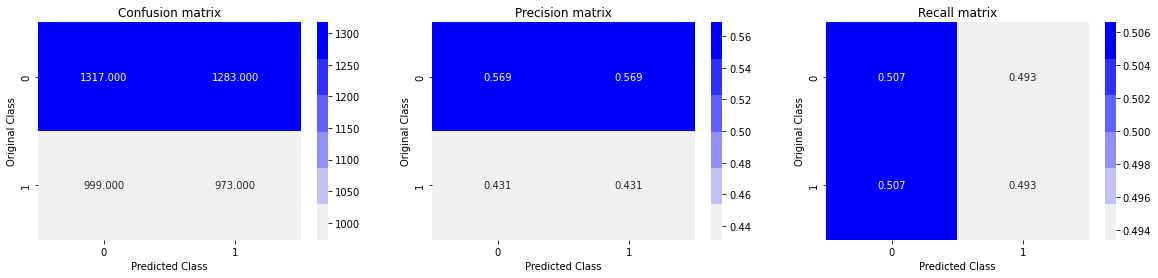

In [44]:
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])

predicted_y =np.argmax(predicted_y, axis=1)

print("Accuracy on Validation Data using Random Model",round(accuracy_score(y_test, predicted_y),2))

plot_confusion_matrix(y_test, predicted_y)


Accuracy on Train Data using NB Model 0.93
Accuracy on Validation Data using NB Model 0.89


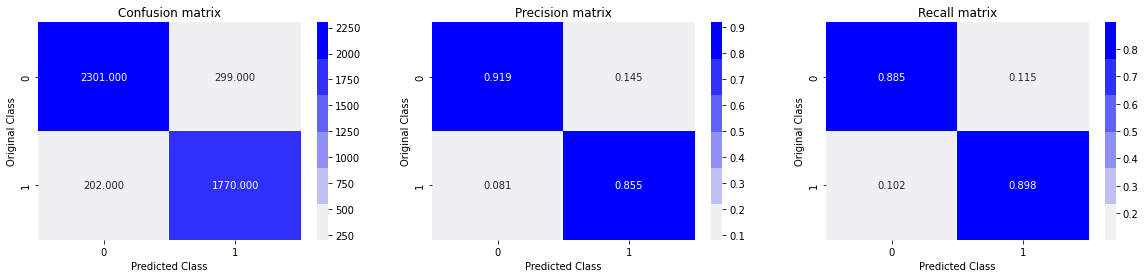

In [45]:
#Multinomial Naive Bayes Model

from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

classifier.fit(X_train,y_train)

predicted_y_train = classifier.predict_proba(X_train)
predicted_y_train = np.argmax(predicted_y_train,axis=1)
print("Accuracy on Train Data using NB Model",round(metrics.accuracy_score(y_train, predicted_y_train),2))

predict_y = classifier.predict_proba(X_test)
predicted_y =np.argmax(predict_y,axis=1)

#print("Total number of validation data points :", len(predicted_y))
print("Accuracy on Validation Data using NB Model",round(metrics.accuracy_score(y_test,predicted_y),2))
plot_confusion_matrix(y_test, predicted_y)

In [46]:
#Passive Aggressive Classification Model

In [47]:

from sklearn.linear_model import PassiveAggressiveClassifier

In [48]:
linear_clf=PassiveAggressiveClassifier()
# Fitting model 
linear_clf.fit(X_train, y_train)

PassiveAggressiveClassifier()

Accuracy on Train Data using PassiveAgressive Model 1.0
Total number of validation data points : 4572
Accuracy on Validation Data using PassiveAgressive Model 0.91


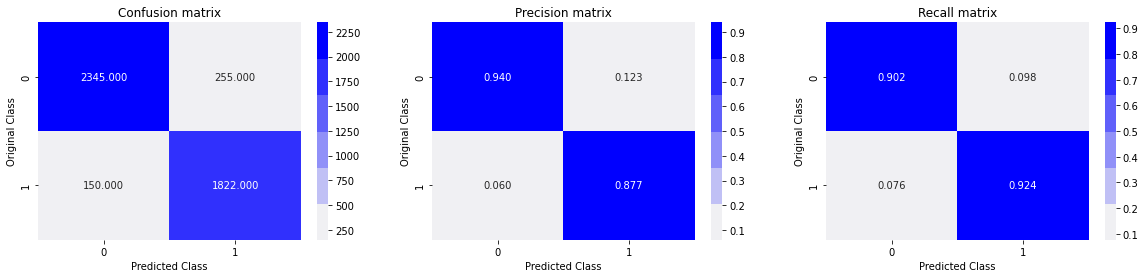

In [49]:
predictions=linear_clf.predict(X_test)

predicted_y_train = linear_clf.predict(X_train)
print("Accuracy on Train Data using PassiveAgressive Model",round(metrics.accuracy_score(y_train, predicted_y_train),2))

pred = linear_clf.predict(X_test)

print("Total number of validation data points :", len(predicted_y))
print("Accuracy on Validation Data using PassiveAgressive Model",round(metrics.accuracy_score(y_test,pred),2))
plot_confusion_matrix(y_test, pred)

In [50]:
metrics.accuracy_score(y_test,pred)

0.9114173228346457